In [1]:
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score
import warnings
warnings.filterwarnings('ignore')

# Reading Data + Adding headers

In [2]:
hepatitis_data = pd.read_csv("hepatitis.data", names= ["Classe", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLESPIDERS", "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN", "PROTIME", "HISTOLOGY"])
df = pd.DataFrame(hepatitis_data)

## Showing Data

In [3]:
df

,Classe,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLESPIDERS,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


## DataFrame Head

In [4]:
df.head()

,Classe,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLESPIDERS,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


## Describing DataFrame

In [5]:
lines , columns = df.shape
print(f'lines : {lines}  Columns : {columns}')

lines : 155  Columns : 20


## Classe Distribution : 

In [6]:
df.describe()

,Classe,AGE,SEX,ANTIVIRALS,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


## Replacing '?' with Numpy "Nan"

In [7]:
df.replace(['?'], np.nan, inplace=True)

## Columns Types

In [8]:
print(df.dtypes)

Classe                     int64
AGE                        int64
SEX                        int64
STEROID                   object
ANTIVIRALS                 int64
FATIGUE                   object
MALAISE                   object
ANOREXIA                  object
LIVER BIG                 object
LIVER FIRM                object
SPLEEN PALPABLESPIDERS    object
SPIDERS                   object
ASCITES                   object
VARICES                   object
BILIRUBIN                 object
ALK PHOSPHATE             object
SGOT                      object
ALBUMIN                   object
PROTIME                   object
HISTOLOGY                  int64
dtype: object


## Classe Distribution 

In [9]:
Distribution = df['Classe'].value_counts()
alive = Distribution[2]
dead = Distribution[1]
print(f' alive {alive} dead {dead}')

 alive 123 dead 32


Text(0, 0.5, 'Number of people')

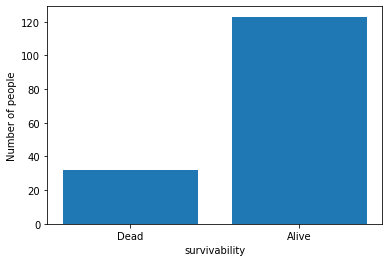

In [10]:
plt.bar(["Dead", "Alive"], [Distribution[1], Distribution[2]])
plt.xlabel("survivability")
plt.ylabel("Number of people")

## Data Frame Informations

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Classe                  155 non-null    int64 
 1   AGE                     155 non-null    int64 
 2   SEX                     155 non-null    int64 
 3   STEROID                 154 non-null    object
 4   ANTIVIRALS              155 non-null    int64 
 5   FATIGUE                 154 non-null    object
 6   MALAISE                 154 non-null    object
 7   ANOREXIA                154 non-null    object
 8   LIVER BIG               145 non-null    object
 9   LIVER FIRM              144 non-null    object
 10  SPLEEN PALPABLESPIDERS  150 non-null    object
 11  SPIDERS                 150 non-null    object
 12  ASCITES                 150 non-null    object
 13  VARICES                 150 non-null    object
 14  BILIRUBIN               149 non-null    object
 15  ALK PH

## Making a copy 

In [12]:
new_df = df.copy()
new_df

,Classe,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLESPIDERS,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,NaN,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,NaN,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


# Preprocessing

## Missing values 


## Plotting missing values

<AxesSubplot:>

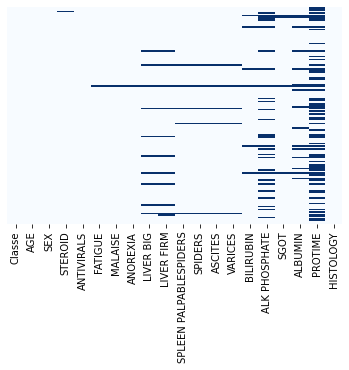

In [13]:
sns.heatmap(new_df.isna(), yticklabels= False, cbar= False, cmap="Blues")

### Missing values:

In [14]:
print(f' total missing values : {new_df.isna().sum().sum()}')

 total missing values : 167


### Filling missing numerical values 

In [15]:
numerical_columns = ["AGE", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN", "PROTIME" ]
for column in numerical_columns:
    new_df[column] = new_df[column].astype(float)
    new_df[column] = new_df[column].fillna(new_df[column].mean())

### Filling missing categorial values

In [16]:
for column in new_df.columns.drop(numerical_columns):
    if column != "Classe":
        new_df[column] = new_df[column].astype(float)
        #new_df[column] = new_df[column].fillna(new_df[column].mode().sample(1, random_state=1).values[0])
        new_df[column] = new_df[column].fillna(int(random.choice([1, 2])))

### Checking if there is any missing values

In [17]:
print(f' total missing values : {new_df.isna().sum().sum()}')

 total missing values : 0


# Visualisation

## Heatmap

<AxesSubplot:>

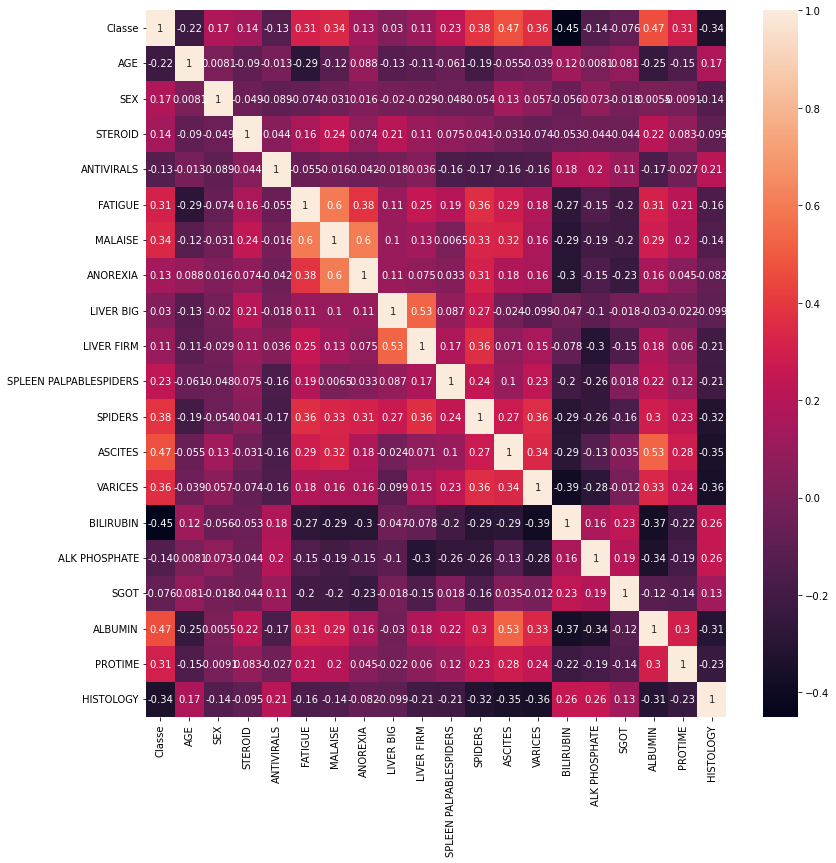

In [18]:
correlations = new_df.corr()
f, ax = plt.subplots(figsize = (13, 13))
sns.heatmap(correlations, annot= True)

## Males vs Females

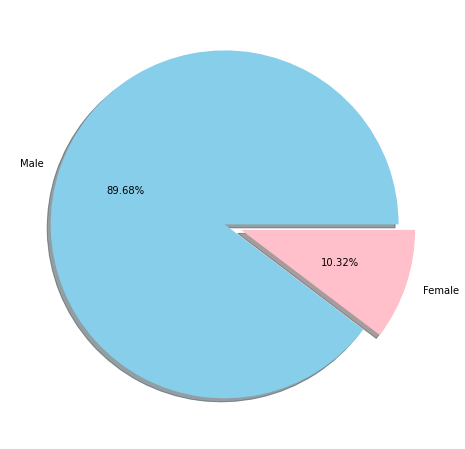

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["SEX"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

## Survivibility Frequency for Sex 

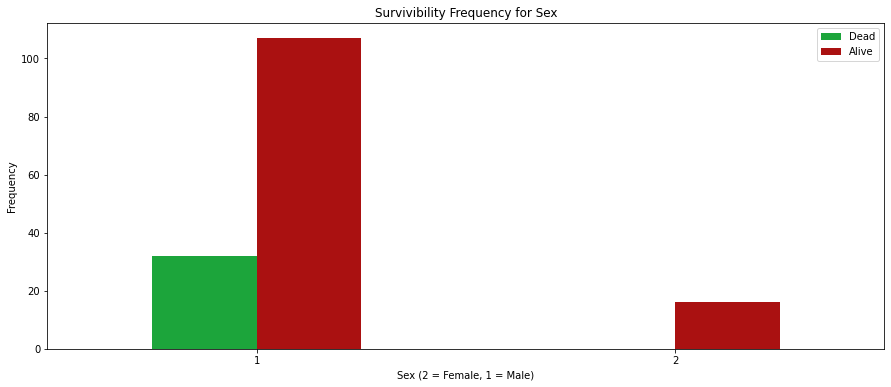

In [20]:
pd.crosstab(df.SEX,df.Classe).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Survivibility Frequency for Sex')
plt.xlabel('Sex (2 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Dead", "Alive"])
plt.ylabel('Frequency')
plt.show()

## The relation between features values and the number of instances of each class

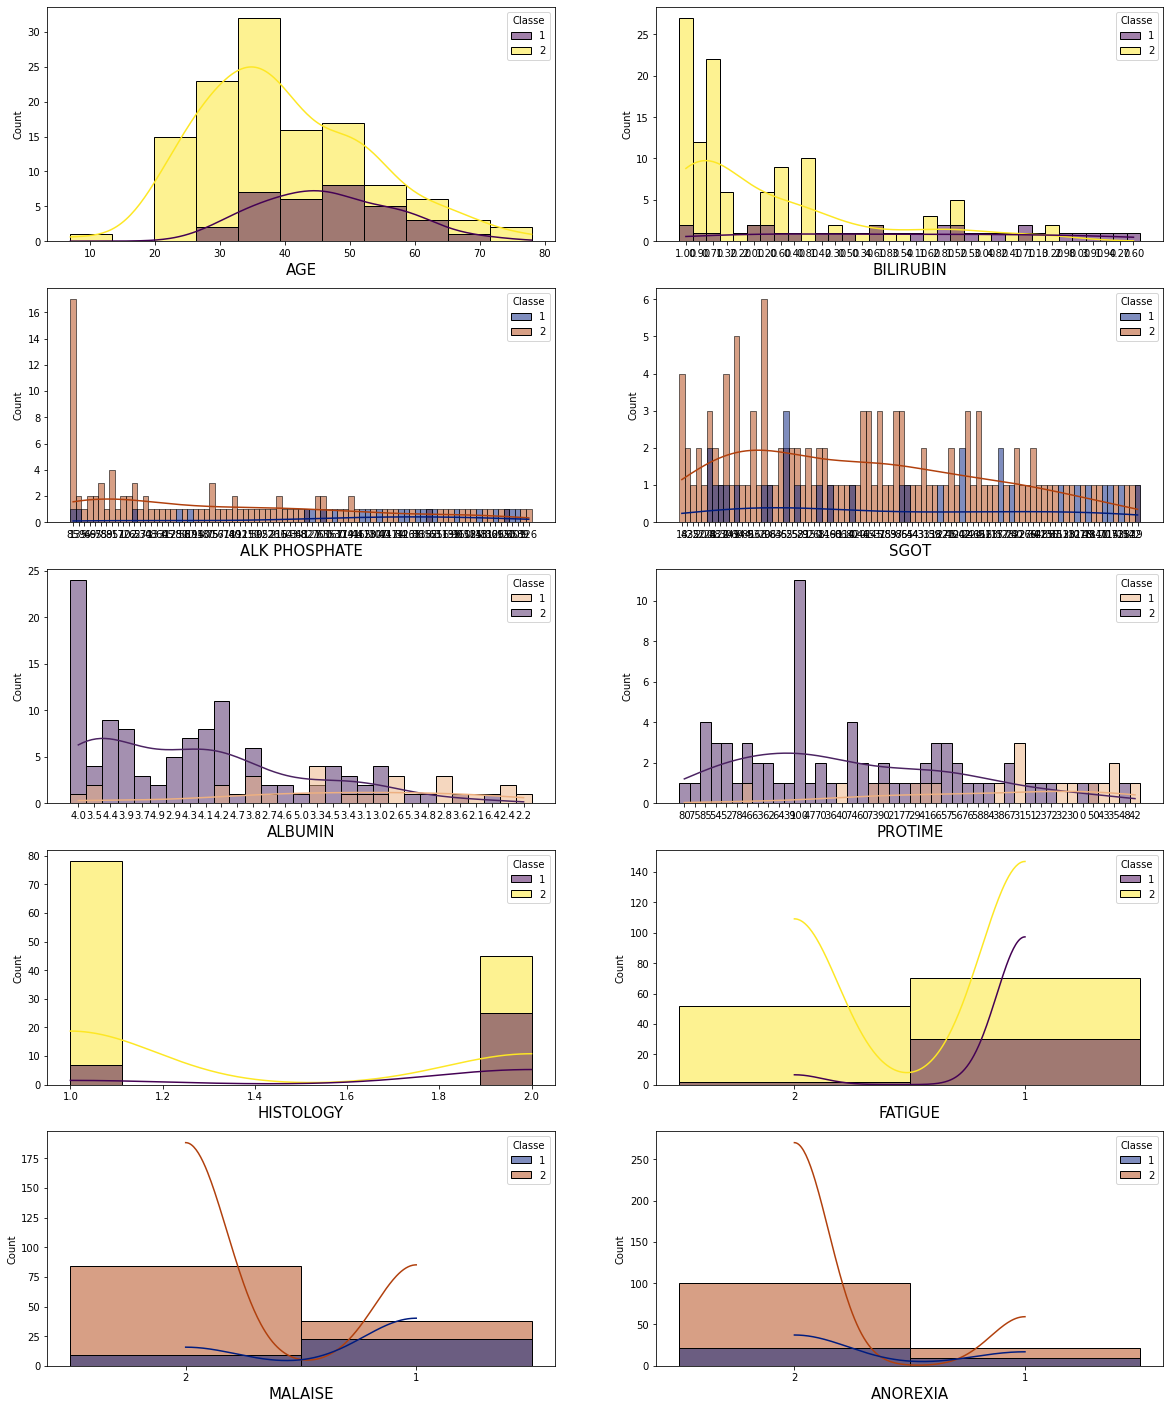

In [21]:

fig, ax =plt.subplots(5,2, figsize=(20,25)) 


sns.histplot(x = df["AGE"], hue = df["Classe"], palette="viridis", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("AGE",fontsize=15)

sns.histplot(x = df["BILIRUBIN"], hue = df["Classe"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("BILIRUBIN",fontsize=15)


sns.histplot(x = df["ALK PHOSPHATE"], hue = df["Classe"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("ALK PHOSPHATE",fontsize=15)

sns.histplot(x = df["SGOT"], hue = df["Classe"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("SGOT",fontsize=15)


sns.histplot(x = df["ALBUMIN"], hue = df["Classe"], palette="flare", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("ALBUMIN",fontsize=15)

sns.histplot(x = df["PROTIME"], hue = df["Classe"], palette="flare", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("PROTIME",fontsize=15)


sns.histplot(x = df["HISTOLOGY"], hue = df["Classe"], palette="viridis", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("HISTOLOGY",fontsize=15)

sns.histplot(x = df["FATIGUE"], hue = df["Classe"], palette="viridis", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("FATIGUE",fontsize=15);


sns.histplot(x = df["MALAISE"], hue = df["Classe"], palette="dark", kde=True, ax=ax[4,0]);
ax[4,0].set_xlabel("MALAISE",fontsize=15)

sns.histplot(x = df["ANOREXIA"], hue = df["Classe"], palette="dark", kde=True, ax=ax[4,1]);
ax[4,1].set_xlabel("ANOREXIA",fontsize=15);

## Heart Disease Frequency for Ages

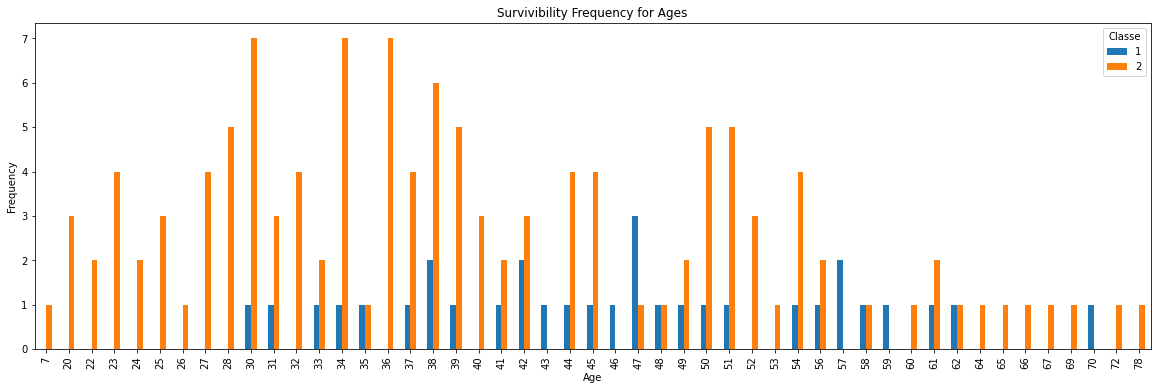

In [22]:
pd.crosstab(df.AGE,df.Classe).plot(kind="bar",figsize=(20,6))
plt.title('Survivibility Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Converting categorial values to integer


In [23]:
for column in new_df.columns.drop(numerical_columns):
    new_df[column] = new_df[column].astype(np.int)

#### Labeling classe values

In [24]:
new_df['Classe'].replace({
    2 : "Alive",
    1 : "Dead"
}, inplace=True)

#### saving pre-processed data

In [25]:
pre_processed_data = new_df.copy()

## Data after dealing with missing values

In [26]:
 new_df

,Classe,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLESPIDERS,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,Alive,30.0,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18.0,4.0,61.852273,1
1,Alive,50.0,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42.0,3.5,61.852273,1
2,Alive,78.0,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32.0,4.0,61.852273,1
3,Alive,31.0,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52.0,4.0,80.000000,1
4,Alive,34.0,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105.325397,200.0,4.0,61.852273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Dead,46.0,1,2,2,1,1,1,2,2,2,1,1,1,7.6,105.325397,242.0,3.3,50.000000,2
151,Alive,44.0,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126.000000,142.0,4.3,61.852273,2
152,Alive,61.0,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75.000000,20.0,4.1,61.852273,2
153,Alive,53.0,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81.000000,19.0,4.1,48.000000,2


### Changing column name "Classe" to  "label"
Because class is a keyword in Python

In [27]:
new_df = new_df.rename(columns={'Classe' : 'label'})

### Splitting DataFrame

In [28]:
y = new_df['label']
x = new_df.drop(['label', 'PROTIME'], axis=1)

### Data features

In [29]:
x

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLESPIDERS,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,30.0,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18.0,4.0,1
1,50.0,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42.0,3.5,1
2,78.0,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32.0,4.0,1
3,31.0,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52.0,4.0,1
4,34.0,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105.325397,200.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46.0,1,2,2,1,1,1,2,2,2,1,1,1,7.6,105.325397,242.0,3.3,2
151,44.0,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126.000000,142.0,4.3,2
152,61.0,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75.000000,20.0,4.1,2
153,53.0,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81.000000,19.0,4.1,2


In [30]:
# Standarisation
scaler = StandardScaler()
x1 = scaler.fit_transform(x)
x1 = pd.DataFrame(x1, index=x.index, columns=x.columns)
x1

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLESPIDERS,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,-0.894192,2.947457,-1.019546,0.428026,1.34840,0.805566,0.510061,-1.851640,0.919368,0.489898,0.752101,0.384900,0.362473,-0.360938,-4.394144e-01,-0.769834,0.297246,-0.907485
1,0.702579,-0.339276,-1.019546,0.428026,-0.74162,0.805566,0.510061,-1.851640,0.919368,0.489898,0.752101,0.384900,0.362473,-0.445364,6.415347e-01,-0.497704,-0.516084,-0.907485
2,2.938059,-0.339276,0.980829,0.428026,-0.74162,0.805566,0.510061,0.540062,0.919368,0.489898,0.752101,0.384900,0.362473,-0.614217,-2.016056e-01,-0.611092,0.297246,-0.907485
3,-0.814353,-0.339276,0.980829,-2.336308,1.34840,0.805566,0.510061,0.540062,0.919368,0.489898,0.752101,0.384900,0.362473,-0.614217,-1.282555e+00,-0.384316,0.297246,-0.907485
4,-0.574838,-0.339276,0.980829,0.428026,1.34840,0.805566,0.510061,0.540062,0.919368,0.489898,0.752101,0.384900,0.362473,-0.360938,-3.072242e-16,1.293820,0.297246,-0.907485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.383225,-0.339276,0.980829,0.428026,-0.74162,-1.241364,-1.960548,0.540062,0.919368,0.489898,-1.329608,-2.598076,-2.758824,5.211214,-3.072242e-16,1.770048,-0.841416,1.101946
151,0.223548,-0.339276,0.980829,0.428026,-0.74162,0.805566,0.510061,0.540062,-1.087703,0.489898,0.752101,0.384900,0.362473,-0.445364,4.469639e-01,0.636172,0.785243,1.101946
152,1.580803,-0.339276,-1.019546,0.428026,-0.74162,-1.241364,0.510061,-1.851640,-1.087703,0.489898,-1.329608,0.384900,0.362473,-0.529791,-6.556042e-01,-0.747157,0.459911,1.101946
153,0.942095,2.947457,-1.019546,0.428026,-0.74162,0.805566,0.510061,0.540062,0.919368,-2.041241,-1.329608,0.384900,-2.758824,0.061195,-5.258903e-01,-0.758496,0.459911,1.101946


### Data labels

In [31]:
y

0      Alive
1      Alive
2      Alive
3      Alive
4      Alive
       ...  
150     Dead
151    Alive
152    Alive
153    Alive
154     Dead
Name: label, Length: 155, dtype: object

# Clustering

### Choosing the right number of clusters

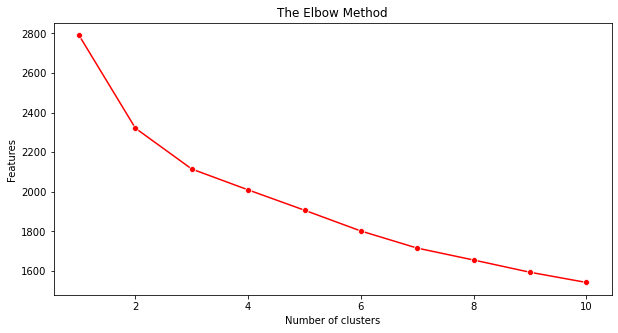

In [32]:
import seaborn as sns
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x1)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Features')
plt.show()


### Choosing  k = 2 Based On the Elbow Methode

## Using Kmeans with k = 2

In [33]:
kmeans = KMeans(n_clusters=2, init='random', n_init=30)
kmeans.fit(x1)

KMeans(init='random', n_clusters=2, n_init=30)

## Getting Clustering results

In [34]:
cluster_labels = kmeans.labels_
cluster_labels

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0])

## Preprocessing results for visualisation

In [35]:
# Setting up pca function
pca = PCA(n_components=2)

# Converting our results to 2D
x_reduced = pd.DataFrame(pca.fit_transform(x1), index=x1.index, columns=["attr1", "attr2"])
x_reduced

,attr1,attr2
0,-1.973411,-1.141268
1,-0.515979,-0.912547
2,-1.242810,0.311579
3,-3.024511,0.346773
4,-1.971476,0.952946
...,...,...
150,5.005040,2.730742
151,-0.408246,0.179748
152,1.203350,-2.083910
153,1.223766,0.880839


In [36]:
# Concatinating the 2D features with original labels and the clustering results
x_reduced = pd.concat([x_reduced, y, pd.Series(cluster_labels, name='cluster')], axis=1)

In [37]:
x_reduced

,attr1,attr2,label,cluster
0,-1.973411,-1.141268,Alive,1
1,-0.515979,-0.912547,Alive,1
2,-1.242810,0.311579,Alive,1
3,-3.024511,0.346773,Alive,1
4,-1.971476,0.952946,Alive,1
...,...,...,...,...
150,5.005040,2.730742,Dead,0
151,-0.408246,0.179748,Alive,1
152,1.203350,-2.083910,Alive,0
153,1.223766,0.880839,Alive,0


In [38]:
new_distribution = x_reduced['cluster'].value_counts()
cluster1 = new_distribution[1]
cluster2 = new_distribution[0]
print(f' cluster 1 : {cluster1} cluster 2 :  {cluster2}')

 cluster 1 : 97 cluster 2 :  58


<BarContainer object of 2 artists>

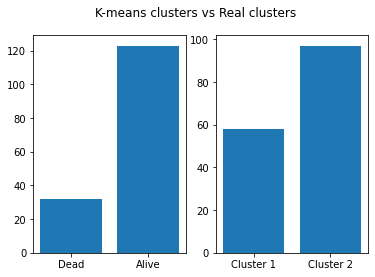

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('K-means clusters vs Real clusters')
ax1.bar(["Dead", "Alive"], [Distribution[1], Distribution[2]])
ax2.bar(["Cluster 1", "Cluster 2"], [new_distribution[0], new_distribution[1]])

### Kmeans Centers

In [40]:
kmeans.cluster_centers_

array([[ 0.25933763,  0.11406679, -0.19180456,  0.33270398, -0.70558503,
        -0.74727721, -0.55485663, -0.24342684, -0.43021436, -0.47018941,
        -0.82712633, -0.64371237, -0.5523898 ,  0.57914533,  0.56161133,
         0.38550494, -0.70949931,  0.54762039],
       [-0.15506786, -0.06820488,  0.11468726, -0.1989364 ,  0.4218962 ,
         0.44682555,  0.33176994,  0.14555419,  0.25724158,  0.28114418,
         0.49457038,  0.38490018,  0.33029493, -0.34629308, -0.33580884,
        -0.23050811,  0.4242367 , -0.32744312]])

### Converting Kmeans clusters to 2D for Viusalisation purposes

In [41]:
centroids = pca.transform(kmeans.cluster_centers_)

In [42]:
centroids

array([[ 2.23821019, -0.02012445],
       [-1.33831125,  0.01203318]])

# Plotting

## Before Clustering

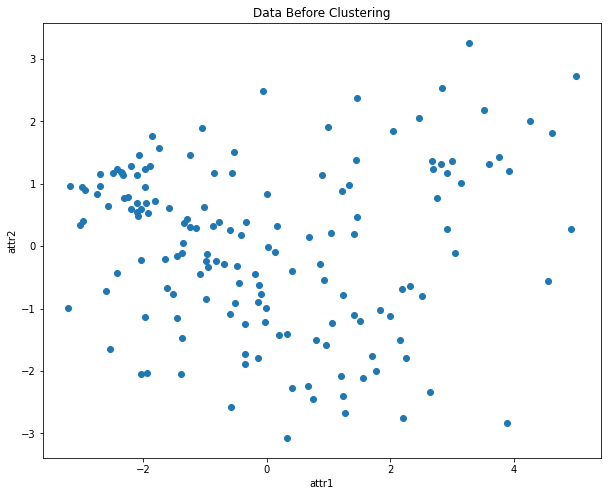

In [43]:
plt.figure(figsize=(10, 8))
plt.scatter(x_reduced['attr1'], x_reduced['attr2'])
plt.xlabel("attr1")
plt.ylabel("attr2")
plt.title('Data Before Clustering')
plt.show()

## After Clustering

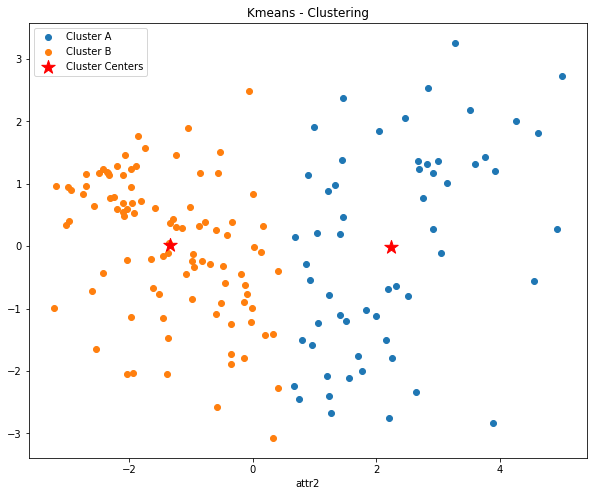

In [44]:
def clustering_plotter():
    cluster_0_examples = x_reduced.query("cluster == 0")
    cluster_1_examples = x_reduced.query("cluster == 1")

    plt.figure(figsize=(10, 8))
    plt.scatter(cluster_0_examples['attr1'], cluster_0_examples['attr2'], label="Cluster A")
    plt.scatter(cluster_1_examples['attr1'], cluster_1_examples['attr2'], label="Cluster B")
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker="*", s=200, label='Cluster Centers')
    plt.xlabel("attr1")
    plt.xlabel("attr2")
    plt.title('Kmeans - Clustering')
    plt.legend()
    plt.show()
clustering_plotter()

# Clustering 30 times

In [45]:
from sklearn.metrics import rand_score

n_iter = 30
S_scores = []
R_scores = []
# Standarisation
scaler = StandardScaler()
x1 = scaler.fit_transform(x)
x1 = pd.DataFrame(x1, index=x.index, columns=x.columns)

original_labels = x_reduced.copy()
original_labels['label'].replace({
    'Alive' : 1,
    'Dead' : 0
}, inplace=True)


for i in range(n_iter):
    kmeans = KMeans(n_clusters=2, init='random', )
    kmeans.fit(x1)
    s_score = silhouette_score(x1, kmeans.labels_, metric='euclidean')
    S_scores.append(s_score)
    r_score = rand_score(original_labels['label'], kmeans.labels_)
    R_scores.append(r_score)

    
results = {'Silhouette score':S_scores,'Rand index':R_scores}

## Clustering results

In [46]:
results_df = pd.DataFrame(results)
results_df

,Silhouette score,Rand index
0,0.196388,0.641056
1,0.196388,0.641056
2,0.197891,0.648094
3,0.196388,0.641056
4,0.196388,0.641056
5,0.196388,0.641056
6,0.196388,0.641056
7,0.189386,0.627482
8,0.196388,0.641056
9,0.196388,0.641056


## Analysing results

In [47]:
results_df = results_df.describe()
results_df = results_df.drop(["count", "25%", "50%", "75%"])
results_df

,Silhouette score,Rand index
mean,0.195938,0.640871
std,0.002292,0.005250
min,0.189386,0.627482
max,0.197891,0.648094


## Using previous pre-processed data

In [48]:
pre_processed_data['Classe'].replace({
    "Alive" : 2,
    "Dead" : 1
}, inplace=True)
pre_processed_data

,Classe,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLESPIDERS,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30.0,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18.0,4.0,61.852273,1
1,2,50.0,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42.0,3.5,61.852273,1
2,2,78.0,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32.0,4.0,61.852273,1
3,2,31.0,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52.0,4.0,80.000000,1
4,2,34.0,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105.325397,200.0,4.0,61.852273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46.0,1,2,2,1,1,1,2,2,2,1,1,1,7.6,105.325397,242.0,3.3,50.000000,2
151,2,44.0,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126.000000,142.0,4.3,61.852273,2
152,2,61.0,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75.000000,20.0,4.1,61.852273,2
153,2,53.0,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81.000000,19.0,4.1,48.000000,2


# Classification

## Training Data :

In [49]:
X = pre_processed_data.drop("Classe", axis=1)
X.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLESPIDERS,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30.0,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18.0,4.0,61.852273,1
1,50.0,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42.0,3.5,61.852273,1
2,78.0,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32.0,4.0,61.852273,1
3,31.0,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52.0,4.0,80.000000,1
4,34.0,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105.325397,200.0,4.0,61.852273,1


## Testing/Validation Data

In [50]:
# y data
Y = pre_processed_data["Classe"]
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: Classe, dtype: int64

## Splitting Data

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(124, 31)

In [52]:
y_test

81     2
142    2
31     1
29     2
118    1
60     2
93     2
147    1
153    2
68     2
42     2
138    1
78     2
75     2
15     2
19     2
30     1
90     2
117    2
137    2
18     2
12     2
9      2
24     2
69     2
131    1
95     2
45     2
86     1
84     2
126    2
Name: Classe, dtype: int64

## Data Scalling

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_mlp = X_train
X_test_mlp = X_test

## Setting up a Visualization Function

In [54]:
x_test_plt = np.array(X_test)
y_test_plt = np.array(y_test)
x_test_plt = pd.DataFrame(x_test_plt)
y_test_plt = pd.DataFrame(y_test_plt)
x_test_plt_reduced = pd.DataFrame(pca.fit_transform(x_test_plt), index=x_test_plt.index, columns=["attr1", "attr2"])
x_test_plt_reduced = pd.concat([x_test_plt_reduced, y_test_plt], axis=1)
x_test_plt_reduced = x_test_plt_reduced.copy()
x_test_plt_reduced = x_test_plt_reduced.rename(columns={0 : 'label'})

In [55]:
def classification_plotter(predictions):
    x_test_plt_reduced_knn = pd.concat([x_test_plt_reduced, pd.Series(predictions, name='cluster')], axis=1)
    plt.scatter(x_test_plt_reduced_knn['attr1'], x_test_plt_reduced_knn['attr2'])
    plt.xlabel("attr1")
    plt.ylabel("attr2")
    plt.title('Data Before Classification')
    plt.show()
    
    cluster_2_examples = x_test_plt_reduced_knn.query("label == 2")
    cluster_1_examples = x_test_plt_reduced_knn.query("label == 1")
    plt.scatter(cluster_2_examples['attr1'], cluster_2_examples['attr2'], label="Alive")
    plt.scatter(cluster_1_examples['attr1'], cluster_1_examples['attr2'], label="Dead")
    plt.xlabel("attr1")
    plt.ylabel("attr2")
    plt.title('Original Classification')
    plt.legend()
    plt.show()

    cluster_2_examples = x_test_plt_reduced_knn.query("cluster == 2")
    cluster_1_examples = x_test_plt_reduced_knn.query("cluster == 1")
    plt.scatter(cluster_2_examples['attr1'], cluster_2_examples['attr2'], label="Alive")
    plt.scatter(cluster_1_examples['attr1'], cluster_1_examples['attr2'], label="Dead")
    plt.xlabel("attr1")
    plt.ylabel("attr2")
    plt.title('Predicted Classification')
    plt.legend()
    plt.show()

## KNN

## Using train test split

### Setting up the model

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

## Training

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Classification results

In [58]:
predictions_knn = knn.predict(X_test)
predictions_knn

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2], dtype=int64)

# Visualization

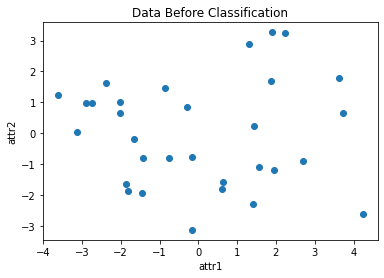

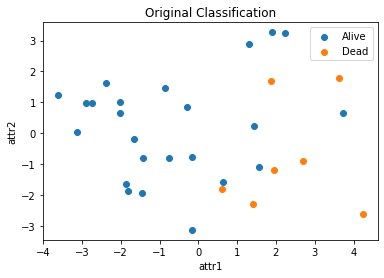

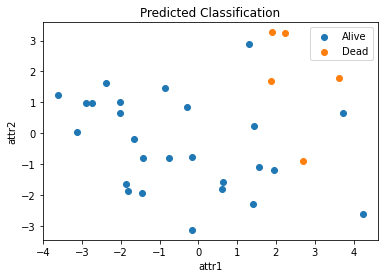

In [59]:
classification_plotter(predictions_knn)

## Model Accuracy

In [60]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier :", round(KNeighborsClassifierScore*100, 2), "%")

Accuracy obtained by K Neighbors Classifier : 80.65 %


## Model Report

In [61]:
from sklearn.metrics import classification_report as report
y_pred_knn = knn.predict(X_test)
print(report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           1       0.60      0.43      0.50         7
           2       0.85      0.92      0.88        24

    accuracy                           0.81        31
   macro avg       0.72      0.67      0.69        31
weighted avg       0.79      0.81      0.79        31



## Model Accuracy | Precision | Recall

In [62]:
accknn=accuracy_score(y_test, y_pred_knn)*100
print("Accuracy of KNN : ", round(accknn, 2)) 
precknn=precision_score(y_test,y_pred_knn)*100
print("Precision of KNN : ", round(precknn, 2))
recallknn=recall_score(y_test,y_pred_knn)*100
print("Recall of KNN : ", round(recallknn, 2))
f1knn=f1_score(y_test,y_pred_knn)*100
print("f1 score of KNN : ",round(f1knn, 2), "%")

Accuracy of KNN :  80.65
Precision of KNN :  60.0
Recall of KNN :  42.86
f1 score of KNN :  50.0 %


## Confusion Matrix for K Neighbors Classifier

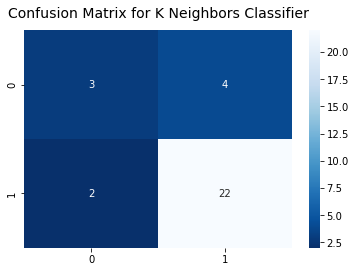

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, y=1.03);

## Using Cross Validation kfold = 5

## Kfolds Scores

In [64]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
X = pre_processed_data.drop("Classe", axis=1)
X = scaler.fit_transform(X)
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score),
                 'recall': make_scorer(recall_score),
                 'f1': make_scorer(f1_score),
                 }
scores = cross_validate(KNeighborsClassifier(), X, Y, cv = 5, scoring = custom_scorer)
test_accuracies = list(scores['test_accuracy'])
test_precisions = list(scores['test_precision'])
test_recalls = list(scores['test_recall'])
test_f1_scores = list(scores['test_f1'])
results_knn = {'Test Accuracies':test_accuracies,'test Precisions':test_precisions,'test Recalls':test_recalls,'test f1 scores':test_f1_scores}
results_knn = pd.DataFrame(results_knn)
results_knn

,Test Accuracies,test Precisions,test Recalls,test f1 scores
0,0.838710,1.000000,0.166667,0.285714
1,0.870968,0.750000,0.500000,0.600000
2,0.806452,0.500000,0.333333,0.400000
3,0.903226,0.833333,0.714286,0.769231
4,0.806452,0.538462,1.000000,0.700000


## Executing 30 times

In [65]:
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score),
                 'recall': make_scorer(recall_score),
                 'f1': make_scorer(f1_score),
                }
    
for iter in range(30):
    pre_processed_data = pre_processed_data.sample(frac=1).reset_index(drop=True)
    
    X = pre_processed_data.drop('Classe', axis=1)
    Y = pre_processed_data['Classe']
    
    X = scaler.fit_transform(X)

    scores = cross_validate(KNeighborsClassifier(), X, Y, cv = 5, scoring = custom_scorer)
    accuracy_results.append(max(list(scores['test_accuracy'])))
    precision_results.append(max(list(scores['test_precision'])))
    recall_results.append(max(list(scores['test_recall'])))
    f1_results.append(max(list(scores['test_f1'])))
    
results_knn = {'accuracy':accuracy_results,'precision':precision_results,'recall':recall_results,'f1 score':f1_results}
results_knn = pd.DataFrame(results_knn)
results_knn

,accuracy,precision,recall,f1 score
0,0.935484,1.000000,0.833333,0.833333
1,0.870968,0.750000,0.666667,0.666667
2,0.870968,1.000000,0.714286,0.666667
3,0.903226,1.000000,0.666667,0.666667
4,0.870968,0.800000,0.666667,0.666667
5,0.870968,0.800000,0.666667,0.666667
6,0.870968,0.714286,0.714286,0.714286
7,0.870968,1.000000,0.666667,0.600000
8,0.935484,1.000000,0.666667,0.800000
9,0.903226,0.833333,0.833333,0.769231


## Analysing KNN Results

In [66]:
results_knn = results_knn.describe()
results_knn = results_knn.drop(["count", "25%", "50%", "75%"])
results_knn

,accuracy,precision,recall,f1 score
mean,0.888172,0.883730,0.711111,0.706853
std,0.030229,0.132133,0.089467,0.082328
min,0.838710,0.666667,0.428571,0.500000
max,0.967742,1.000000,0.857143,0.909091


## DecisionTree

## Using train test split

### Setting up the model

In [67]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

## Training 

In [68]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

## Classification results

In [69]:
predictions_dt = tree.predict(X_test)
predictions_dt

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 1], dtype=int64)

# Visualization

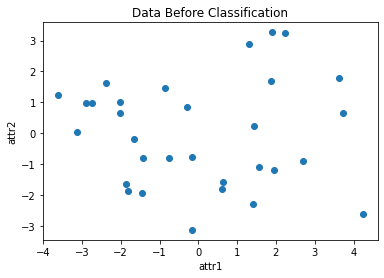

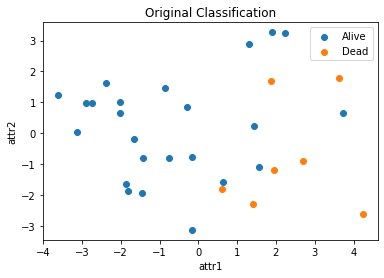

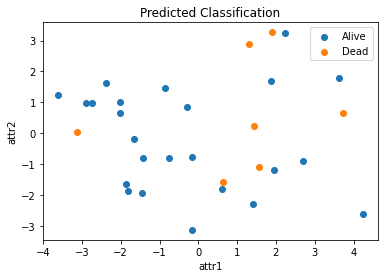

In [70]:
classification_plotter(predictions_dt)

## Model  Accuracy

In [71]:
DecisionTreeClassifierScore = tree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier :", round(DecisionTreeClassifierScore*100, 2), "%")

Accuracy obtained by Decision Tree Classifier : 54.84 %


## Model score report

In [72]:
y_pred_tree = tree.predict(X_test)
print(report(y_test, y_pred_tree));

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.71      0.71      0.71        24

    accuracy                           0.55        31
   macro avg       0.35      0.35      0.35        31
weighted avg       0.55      0.55      0.55        31



In [73]:
accdt=accuracy_score(y_test, y_pred_tree)*100
print("Accuracy of Decision Tree: ", round(accdt, 2), "%") 
precdt=precision_score(y_test,y_pred_tree)*100
print("Precision of Decision Tree : ",round(precdt, 2), "%")
recalldt=recall_score(y_test,y_pred_tree)*100
print("Recall of Decision Tree : ",round(recalldt, 2), "%")
f1dt=f1_score(y_test,y_pred_tree)*100
print("f1 score of Decision Tree : ",round(f1dt, 2), "%")

Accuracy of Decision Tree:  54.84 %
Precision of Decision Tree :  0.0 %
Recall of Decision Tree :  0.0 %
f1 score of Decision Tree :  0.0 %


## Confusion Metrix for Decision Tree Classifier

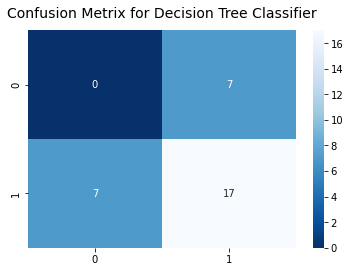

In [74]:
cf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14, y=1.03);

## Using Cross Validation kfold = 5

## Kfolds Score reports

In [75]:
X = pre_processed_data.drop("Classe", axis=1)
X = scaler.fit_transform(X)
scores = cross_validate(DecisionTreeClassifier(), X, Y, cv = 5, scoring = custom_scorer)
test_accuracies = list(scores['test_accuracy'])
test_precisions = list(scores['test_precision'])
test_recalls = list(scores['test_recall'])
test_f1_scores = list(scores['test_f1'])
results_dt = {'Test Accuracies':test_accuracies,'test Precisions':test_precisions,'test Recalls':test_recalls,'test f1 scores':test_f1_scores}
results_dt = pd.DataFrame(results_dt)
results_dt

,Test Accuracies,test Precisions,test Recalls,test f1 scores
0,0.677419,0.250000,0.333333,0.285714
1,0.645161,0.142857,0.166667,0.153846
2,0.806452,0.500000,0.833333,0.625000
3,0.870968,0.800000,0.571429,0.666667
4,0.806452,0.545455,0.857143,0.666667


# Executing 30 times

In [76]:
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []
 
for iter in range(30):
    pre_processed_data = pre_processed_data.sample(frac=1).reset_index(drop=True)
    
    X = pre_processed_data.drop("Classe", axis=1)
    Y = pre_processed_data['Classe']
    
    X = scaler.fit_transform(X)

    scores = cross_validate(DecisionTreeClassifier(), X, Y, cv = 5, scoring = custom_scorer)
    accuracy_results.append(max(list(scores['test_accuracy'])))
    precision_results.append(max(list(scores['test_precision'])))
    recall_results.append(max(list(scores['test_recall'])))
    f1_results.append(max(list(scores['test_f1'])))
    
results_dt = {'accuracy':accuracy_results,'precision':precision_results,'recall':recall_results,'f1 score':f1_results}
results_dt = pd.DataFrame(results_dt)
results_dt

,accuracy,precision,recall,f1 score
0,0.870968,0.714286,0.714286,0.714286
1,0.838710,0.600000,0.833333,0.666667
2,0.838710,0.600000,0.500000,0.545455
3,0.838710,0.666667,0.833333,0.666667
4,0.903226,0.833333,0.714286,0.769231
5,0.903226,0.833333,0.714286,0.769231
6,0.870968,1.000000,0.857143,0.750000
7,0.935484,0.833333,0.833333,0.833333
8,0.935484,1.000000,0.714286,0.800000
9,0.806452,0.600000,0.666667,0.533333


## Analysing Decision Tree Results


In [77]:
results_dt = results_dt.describe()
results_dt = results_dt.drop(["count", "25%", "50%", "75%"])
results_dt

,accuracy,precision,recall,f1 score
mean,0.858065,0.686733,0.747619,0.662166
std,0.038449,0.128535,0.118570,0.094715
min,0.806452,0.500000,0.500000,0.500000
max,0.935484,1.000000,1.000000,0.833333


# SVM


## Using train test split

## Setting up the model

In [78]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)

## Training

In [79]:
svm.fit(X=X_train, y= y_train)

SVC(random_state=1)

## Classification results

In [80]:
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2], dtype=int64)

# Visualization

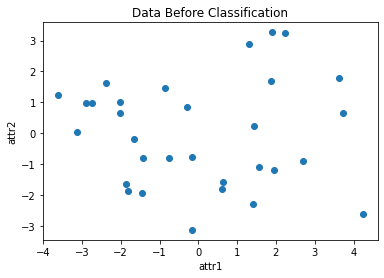

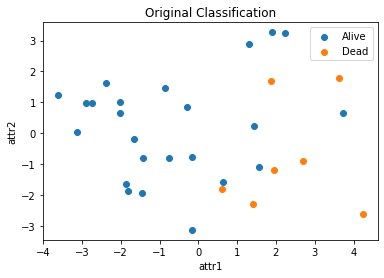

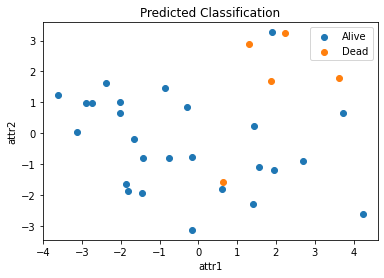

In [81]:
classification_plotter(y_pred_svm)

## Model Accuracy

In [82]:
SVC_Score = svm.score(X_test,y_test)
print("Accuracy obtained by SVM Classifier :", round(SVC_Score*100, 2), "%")

Accuracy obtained by SVM Classifier : 74.19 %


## Model score report

In [83]:
print(report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           1       0.40      0.29      0.33         7
           2       0.81      0.88      0.84        24

    accuracy                           0.74        31
   macro avg       0.60      0.58      0.59        31
weighted avg       0.72      0.74      0.73        31



## Model scores

In [84]:
accsvm=accuracy_score(y_test, y_pred_svm)*100
print("Accuracy of SVM : ", round(accsvm, 2), "%") 
precsvm=precision_score(y_test,y_pred_svm)*100
print("Precision of SVM : ",round(precsvm, 2), "%")
recallsvm=recall_score(y_test,y_pred_svm)*100
print("Recall of SVM : ",round(recallsvm, 2), "%")
f1svm=f1_score(y_test,y_pred_svm)*100
print("f1 score of SVM : ",round(f1svm, 2), "%")

Accuracy of SVM :  74.19 %
Precision of SVM :  40.0 %
Recall of SVM :  28.57 %
f1 score of SVM :  33.33 %


## Confusion Metrix for SVM Classifier

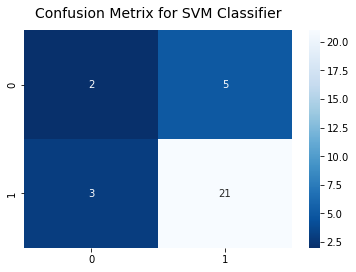

In [85]:
cf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for SVM Classifier", fontsize=14, y=1.03);

## Using Cross Validation kfold = 5

## Kfolds score reports

In [86]:
X = pre_processed_data.drop("Classe", axis=1)
X = scaler.fit_transform(X)
scores = cross_validate(SVC(random_state = 1), X, Y, cv = 5, scoring = custom_scorer)
test_accuracies = list(scores['test_accuracy'])
test_precisions = list(scores['test_precision'])
test_recalls = list(scores['test_recall'])
test_f1_scores = list(scores['test_f1'])
results_svm = {'Test Accuracies':test_accuracies,'test Precisions':test_precisions,'test Recalls':test_recalls,'test f1 scores':test_f1_scores}
results_svm = pd.DataFrame(results_dt)
results_svm

,accuracy,precision,recall,f1 score
mean,0.858065,0.686733,0.747619,0.662166
std,0.038449,0.128535,0.118570,0.094715
min,0.806452,0.500000,0.500000,0.500000
max,0.935484,1.000000,1.000000,0.833333


# Executing 30 times

In [87]:
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []
  
for iter in range(30):
    pre_processed_data = pre_processed_data.sample(frac=1).reset_index(drop=True)
    
    X = pre_processed_data.drop("Classe", axis=1)
    Y = pre_processed_data['Classe']
    
    X = scaler.fit_transform(X)

    scores = cross_validate(SVC(random_state = 1), X, Y, cv = 5, scoring = custom_scorer)
    accuracy_results.append(max(list(scores['test_accuracy'])))
    precision_results.append(max(list(scores['test_precision'])))
    recall_results.append(max(list(scores['test_recall'])))
    f1_results.append(max(list(scores['test_f1'])))
    
results_svm = {'accuracy':accuracy_results,'precision':precision_results,'recall':recall_results,'f1 score':f1_results}
results_svm = pd.DataFrame(results_svm)
results_svm

,accuracy,precision,recall,f1 score
0,0.870968,1.000000,0.571429,0.666667
1,0.935484,1.000000,0.666667,0.800000
2,0.903226,1.000000,0.666667,0.727273
3,0.903226,1.000000,0.833333,0.769231
4,0.870968,1.000000,0.714286,0.714286
5,0.903226,1.000000,0.571429,0.666667
6,0.838710,1.000000,0.571429,0.615385
7,0.903226,1.000000,0.833333,0.769231
8,0.903226,0.833333,0.714286,0.769231
9,0.935484,1.000000,0.714286,0.833333


## Analysing SVM results

In [88]:
results_svm = results_svm.describe()
results_svm = results_svm.drop(["count", "25%", "50%", "75%"])
results_svm

,accuracy,precision,recall,f1 score
mean,0.896774,0.971111,0.638095,0.712737
std,0.023045,0.079140,0.090264,0.066890
min,0.838710,0.666667,0.428571,0.545455
max,0.935484,1.000000,0.833333,0.833333


## Naive Bayes

## Using train test split

## Setting up model

In [89]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

## Training

In [90]:
nb.fit(X=X_train, y= y_train)

GaussianNB()

## Classification results

In [91]:
y_pred_nb = nb.predict(X_test)
y_pred_nb

array([2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 1], dtype=int64)

# Visualization

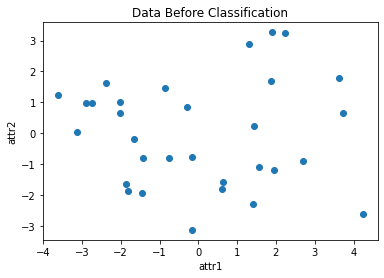

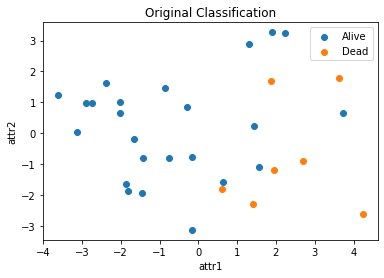

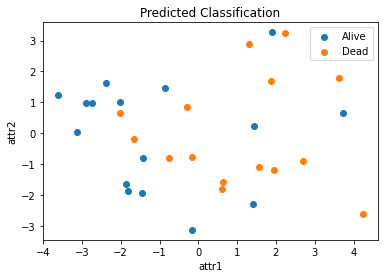

In [92]:
classification_plotter(y_pred_nb)

## Accuracy obtained by Naive Bayes Classifier

In [93]:
NB_Score = nb.score(X_test,y_test)
print("Accuracy obtained by Naive Bayes Classifier :", round(NB_Score*100, 2), "%")

Accuracy obtained by Naive Bayes Classifier : 67.74 %


## Model score report

In [94]:
print(report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           1       0.40      0.86      0.55         7
           2       0.94      0.62      0.75        24

    accuracy                           0.68        31
   macro avg       0.67      0.74      0.65        31
weighted avg       0.82      0.68      0.70        31



## Model scores

In [95]:
accnb=accuracy_score(y_test, y_pred_nb)*100
print("Accuracy of Naive Bayes : ", round(accnb, 2), "%") 
precnb=precision_score(y_test,y_pred_nb)*100
print("Precision of Naive Bayes : ",round(precnb, 2), "%")
recallnb=recall_score(y_test,y_pred_nb)*100
print("Recall of Naive Bayes : ",round(recallnb, 2), "%")
f1nb=f1_score(y_test, y_pred_nb)*100
print("f1 score of Naive Bayes : ",round(f1nb, 2), "%")

Accuracy of Naive Bayes :  67.74 %
Precision of Naive Bayes :  40.0 %
Recall of Naive Bayes :  85.71 %
f1 score of Naive Bayes :  54.55 %


## Confusion Metrix for Naive Bayes Classifier

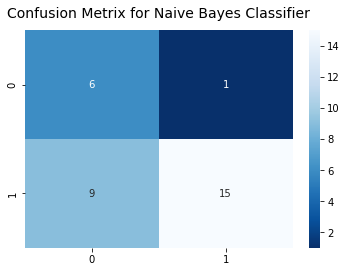

In [96]:
cf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for Naive Bayes Classifier", fontsize=14, y=1.03);

## Using Cross Validation kfold = 5

## Kfolds score reports

In [97]:
X = pre_processed_data.drop("Classe", axis=1)
X = scaler.fit_transform(X)
scores = cross_validate(GaussianNB(), X, Y, cv = 5, scoring = custom_scorer)
test_accuracies = list(scores['test_accuracy'])
test_precisions = list(scores['test_precision'])
test_recalls = list(scores['test_recall'])
test_f1_scores = list(scores['test_f1'])
results_nb = {'Test Accuracies':test_accuracies,'test Precisions':test_precisions,'test Recalls':test_recalls,'test f1 scores':test_f1_scores}
results_nb = pd.DataFrame(results_nb)
results_nb

,Test Accuracies,test Precisions,test Recalls,test f1 scores
0,0.709677,0.428571,0.857143,0.571429
1,0.516129,0.318182,1.000000,0.482759
2,0.677419,0.357143,0.833333,0.500000
3,0.741935,0.428571,1.000000,0.600000
4,0.580645,0.294118,0.833333,0.434783


## Executing 30 times

In [98]:
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []
  
for iter in range(30):
    pre_processed_data = pre_processed_data.sample(frac=1).reset_index(drop=True)
    
    X = pre_processed_data.drop("Classe", axis=1)
    Y = pre_processed_data['Classe']
    
    X = scaler.fit_transform(X)
    
    scores = cross_validate(GaussianNB(), X, Y, cv = 5, scoring = custom_scorer)
    accuracy_results.append(max(list(scores['test_accuracy'])))
    precision_results.append(max(list(scores['test_precision'])))
    recall_results.append(max(list(scores['test_recall'])))
    f1_results.append(max(list(scores['test_f1'])))
    
results_nb = {'accuracy':accuracy_results,'precision':precision_results,'recall':recall_results,'f1 score':f1_results}
results_nb = pd.DataFrame(results_nb)
results_nb

,accuracy,precision,recall,f1 score
0,0.741935,0.416667,1.0,0.583333
1,0.709677,0.437500,1.0,0.608696
2,0.741935,0.454545,1.0,0.555556
3,0.709677,0.411765,1.0,0.583333
4,0.774194,0.461538,1.0,0.631579
5,0.741935,0.466667,1.0,0.636364
6,0.741935,0.416667,1.0,0.583333
7,0.677419,0.388889,1.0,0.560000
8,0.709677,0.437500,1.0,0.608696
9,0.709677,0.428571,1.0,0.571429


## Analysing Naive Bayes results

In [99]:
results_nb = results_nb.describe()
results_nb = results_nb.drop(["count", "25%", "50%", "75%"])
results_nb

,accuracy,precision,recall,f1 score
mean,0.726882,0.439466,1.0,0.596834
std,0.035674,0.037566,0.0,0.039507
min,0.677419,0.384615,1.0,0.526316
max,0.838710,0.545455,1.0,0.705882


# Final results

## Clustering

## K-means

In [100]:
results_df

,Silhouette score,Rand index
mean,0.195938,0.640871
std,0.002292,0.005250
min,0.189386,0.627482
max,0.197891,0.648094


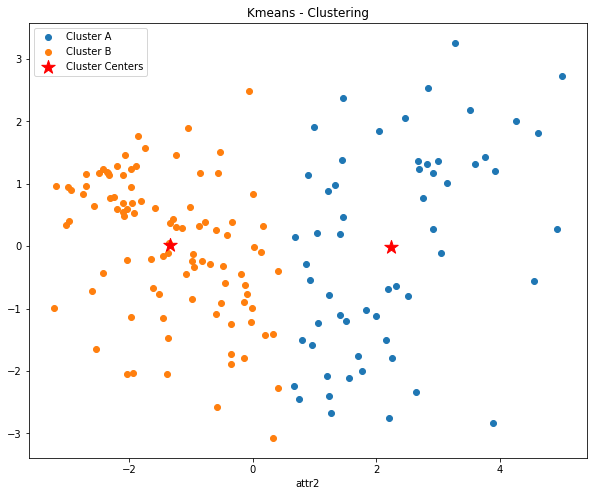

In [101]:
clustering_plotter()

## Classification

## KNN

In [102]:
results_knn

,accuracy,precision,recall,f1 score
mean,0.888172,0.883730,0.711111,0.706853
std,0.030229,0.132133,0.089467,0.082328
min,0.838710,0.666667,0.428571,0.500000
max,0.967742,1.000000,0.857143,0.909091


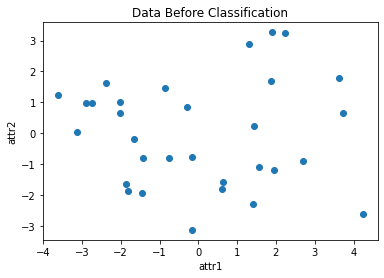

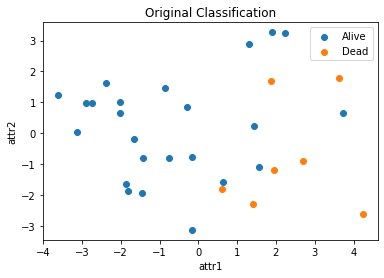

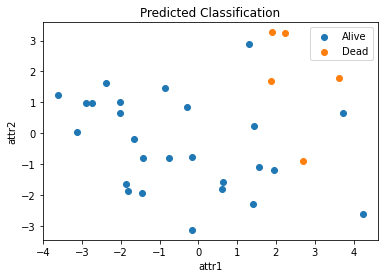

In [103]:
classification_plotter(predictions_knn)

## DecisionTree

In [104]:
results_dt

,accuracy,precision,recall,f1 score
mean,0.858065,0.686733,0.747619,0.662166
std,0.038449,0.128535,0.118570,0.094715
min,0.806452,0.500000,0.500000,0.500000
max,0.935484,1.000000,1.000000,0.833333


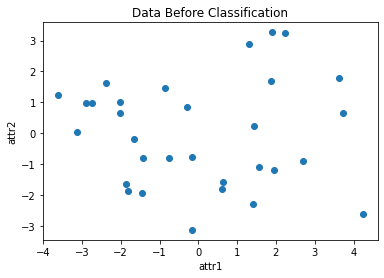

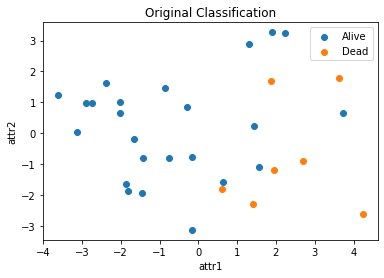

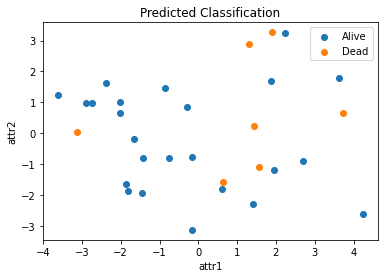

In [105]:
classification_plotter(predictions_dt)

## SVM


In [106]:
results_svm

,accuracy,precision,recall,f1 score
mean,0.896774,0.971111,0.638095,0.712737
std,0.023045,0.079140,0.090264,0.066890
min,0.838710,0.666667,0.428571,0.545455
max,0.935484,1.000000,0.833333,0.833333


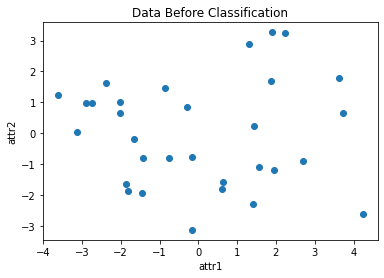

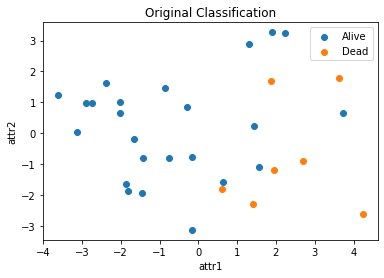

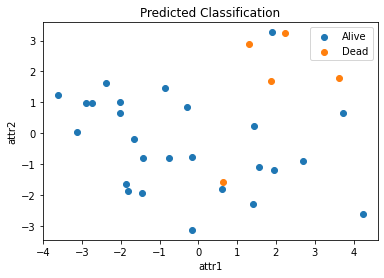

In [107]:
classification_plotter(y_pred_svm)

## Naive Bayes

In [108]:
results_nb

,accuracy,precision,recall,f1 score
mean,0.726882,0.439466,1.0,0.596834
std,0.035674,0.037566,0.0,0.039507
min,0.677419,0.384615,1.0,0.526316
max,0.838710,0.545455,1.0,0.705882


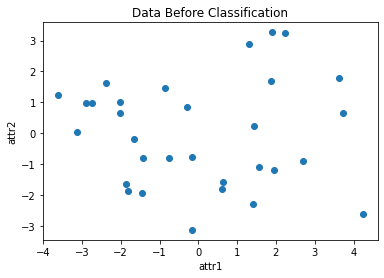

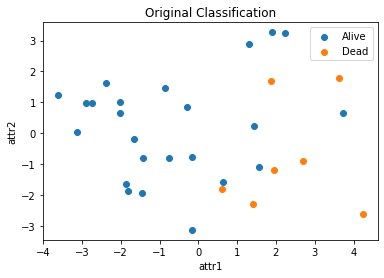

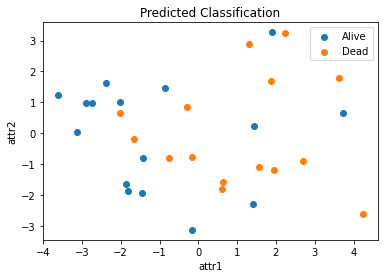

In [109]:
classification_plotter(y_pred_nb)

In [110]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation="relu", solver="sgd", learning_rate_init=0.01, max_iter=1000)
mlp.fit(X_train_mlp, y_train)

MLPClassifier(hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=1000,
              solver='sgd')

In [111]:
y_pred_mlp = mlp.predict(X_test_mlp)
score = accuracy_score(y_pred_mlp, y_test)
score

0.7419354838709677

In [112]:
pre_processed_data

,Classe,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLESPIDERS,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,52.0,1,1,1,2,2,2,2,2,2,2,2,2,0.7,75.0,55.0,4.000000,21.000000,1
1,2,38.0,1,1,1,2,2,2,1,1,2,2,2,2,0.7,70.0,28.0,4.200000,62.000000,1
2,1,48.0,1,1,2,1,1,2,2,1,2,1,1,1,4.8,123.0,157.0,2.700000,31.000000,2
3,2,52.0,1,1,2,1,2,2,2,2,2,2,2,2,1.0,85.0,30.0,4.000000,61.852273,2
4,2,51.0,1,1,2,1,1,1,2,1,1,1,2,1,4.6,215.0,269.0,3.900000,51.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2,53.0,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81.0,19.0,4.100000,48.000000,2
151,1,33.0,1,1,2,1,1,2,2,2,2,2,1,2,0.7,63.0,80.0,3.000000,31.000000,2
152,2,45.0,2,1,2,1,1,2,2,2,1,2,2,2,1.0,85.0,75.0,3.817266,61.852273,1
153,2,36.0,1,1,2,2,2,2,2,2,1,2,2,2,0.8,85.0,44.0,4.200000,85.000000,1


In [113]:
X = pre_processed_data.drop('SGOT', axis=1)
Y = pre_processed_data['SGOT']
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(10, 100), activation="relu", solver="adam", learning_rate_init=0.1, max_iter=5000)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, shuffle=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
mlp.fit(X_train, y_train)
y_pred_mlp_r = mlp.predict(X_test)
loss = np.square(y_test, y_pred_mlp_r).mean()
loss

16800.12271953884